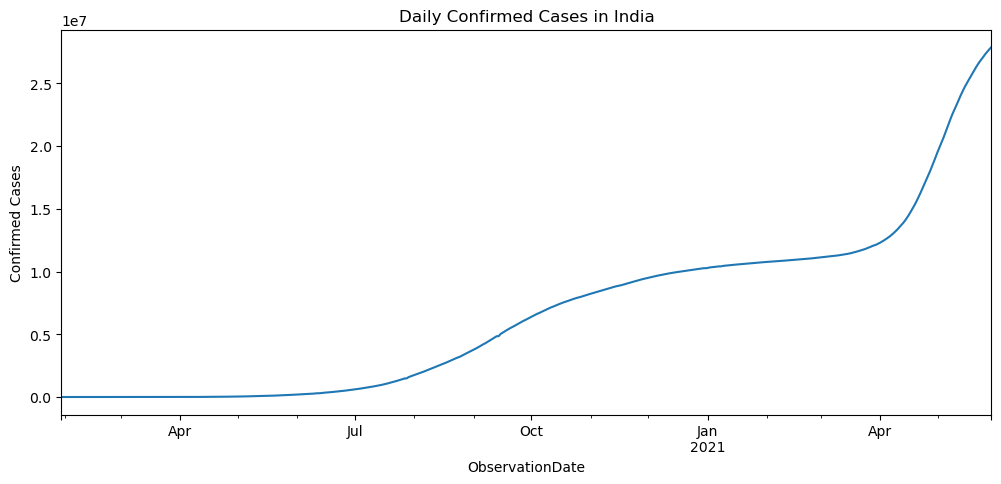

ADF Statistic: 1.7916303292057365
p-value: 0.9983322718893118


C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  486
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5264.170
Date:                Mon, 14 Apr 2025   AIC                          10534.340
Time:                        12:15:14   BIC                          10546.893
Sample:                    01-30-2020   HQIC                         10539.272
                         - 05-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.002    509.655      0.000       0.996       1.004
ma.L1         -0.3533      0.010    -33.650      0.000      -0.374      -0.333
sigma2      1.568e+08   4.04e-11   3.88e+18      0.0

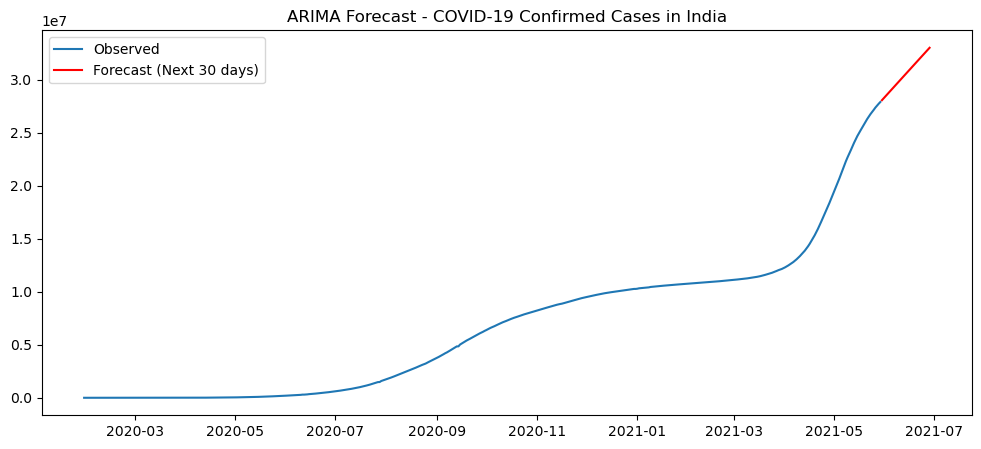

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('covid_19_data.csv')
df.columns = [col.strip().replace('/', '_').replace(' ', '_') for col in df.columns]
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter for one country (e.g., India)
country = 'India'
df_country = df[df['Country_Region'] == country]
df_time = df_country.groupby('ObservationDate')['Confirmed'].sum().reset_index()
df_time.set_index('ObservationDate', inplace=True)
ts = df_time['Confirmed']

# Plot original series
ts.plot(figsize=(12, 5), title=f'Daily Confirmed Cases in {country}')
plt.ylabel('Confirmed Cases')
plt.show()

# ADF test to check stationarity
result = adfuller(ts.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If non-stationary, apply differencing
ts_diff = ts.diff().dropna()

# Fit ARIMA model (p=1, d=1, q=1) — basic configuration
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future steps (e.g., next 30 days)
forecast = model_fit.forecast(steps=30)

# Plot actual + forecast
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast (Next 30 days)', color='red')
plt.title(f'ARIMA Forecast - COVID-19 Confirmed Cases in {country}')
plt.legend()
plt.show()